In [1]:
import numpy as np
import pandas as pd
from utils.mesh import Mesh
from os import path
import pyreadr

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

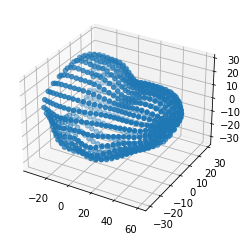

In [2]:
file = path.join("lv-ortho-modes", "data", "surface_points_ASYMP.RData")
data = pyreadr.read_r(file)
df = data["X.ASYMP"]

# order: [ED-endo ED-epi ES-endo ES-epi]
n_of_points = df.shape[1] // 4
ed_endo = df.iloc[:, :n_of_points]
ed_epi = df.iloc[:, n_of_points:n_of_points*2]
es_endo = df.iloc[:, n_of_points*2:n_of_points*3]
es_epi = df.iloc[:, n_of_points*3:n_of_points*4]

def split_points_axis(vec):
    """ 
    receives a vector (np array or pd series) of 3d points in the form [x1, y1, z1, ..., x_n, y_n, z_n] 
    and returns 3 vectors: X, Y & Z consisting of the X coordinate of all points, Y, and so on
    """
    if isinstance(vec, np.ndarray):
        points = vec.reshape(vec.shape[0]//3, 3)
    elif isinstance(vec, pd.Series):
        points = vec.values.reshape(vec.shape[0]//3, 3)
        
    return points.T

x, y, z = split_points_axis(ed_endo.values[0]) # first sample 3d points

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)

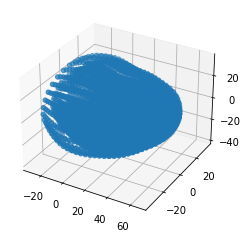

In [3]:
file = path.join("lv-ortho-modes", "data", "mean_shape.RData")
data = pyreadr.read_r(file)
df = data['mean.shape']

x, y, z = split_points_axis(df.values)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
p3d = ax.scatter3D(x, y, z)
plt.show()